# **IMPORTACIÓN DE LIBRERIAS**


In [1]:
import tarfile
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
import matplotlib.pyplot as plt
import numpy as np
from time import time 
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import CSVLogger

# **CARGA DEL DATASET (3000K DE IMÁGENES)**

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 28s 0us/step


# **NORMALIZACIÓN ESTANDAR DEL DATASET**


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# **CREACIÓN DEL MODELO**

In [3]:
# except Exception as e:
model = Sequential()

#Layer 1 
model.add( Conv2D(48, kernel_size=(3,3),strides=(1,1), activation='relu', padding='same', input_shape=x_train.shape[1:] ) )
model.add( MaxPool2D(pool_size=(2,2),strides=(2,2)) )

#Layer 2
model.add( Conv2D(96, kernel_size=(3,3), activation='relu', padding='same') )
model.add( MaxPool2D(pool_size=(2,2),strides=(2,2)) )

#Layer 3
model.add( Conv2D(192, kernel_size=(3,3), activation='relu', padding='same') )


#Layer 4
model.add( Conv2D(192, kernel_size=(3,3), activation='relu', padding='same') )
model.add( MaxPool2D(pool_size=(2,2),strides=(2,2)) )

#Layer 5
model.add( Conv2D(256, kernel_size=(3,3), activation='relu', padding='same') )
model.add( MaxPool2D(pool_size=(2,2),strides=(2,2)) )

model.add(Flatten())

#Layer 6
model.add(Dense(512, activation='tanh'))

#Layer 7 
model.add(Dense(256, activation='tanh'))

#Prediction
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# **ENTRENAMIENTO DEL MODELO**

In [4]:
start_time = time()
history = model.fit(x_train, y_train, batch_size= 128, epochs=10 , validation_data=(x_test, y_test), verbose=1)
elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

Epoch 1/10
391/391 [==============================] - 6s 15ms/step - loss: 1.5611 - accuracy: 0.4203 - val_loss: 1.1994 - val_accuracy: 0.5573
Epoch 2/10
391/391 [==============================] - 5s 13ms/step - loss: 1.0193 - accuracy: 0.6345 - val_loss: 0.9499 - val_accuracy: 0.6601
Epoch 3/10
391/391 [==============================] - 5s 13ms/step - loss: 0.7925 - accuracy: 0.7202 - val_loss: 0.7801 - val_accuracy: 0.7246
Epoch 4/10
391/391 [==============================] - 5s 13ms/step - loss: 0.6402 - accuracy: 0.7750 - val_loss: 0.7457 - val_accuracy: 0.7434
Epoch 5/10
391/391 [==============================] - 5s 13ms/step - loss: 0.5260 - accuracy: 0.8167 - val_loss: 0.7271 - val_accuracy: 0.7551
Epoch 6/10
391/391 [==============================] - 5s 13ms/step - loss: 0.4323 - accuracy: 0.8477 - val_loss: 0.7826 - val_accuracy: 0.7504
Epoch 7/10
391/391 [==============================] - 5s 14ms/step - loss: 0.3525 - accuracy: 0.8749 - val_loss: 0.8211 - val_accuracy: 0.7523

# **RESULTADOS DE LA EVALUACIÓN**

In [5]:
test_score = model.evaluate(x_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 3ms/step - loss: 1.0495 - accuracy: 0.7368
Test loss 1.0495, accuracy 73.68%


# **GRÁFICA DE LA EVALUACIÓN Y ENTRENAMIENTO ACC**

[0.5572999715805054, 0.660099983215332, 0.7246000170707703, 0.743399977684021, 0.7551000118255615, 0.7504000067710876, 0.7523000240325928, 0.7494000196456909, 0.7479000091552734, 0.7368000149726868]


Text(0, 0.5, 'acc')

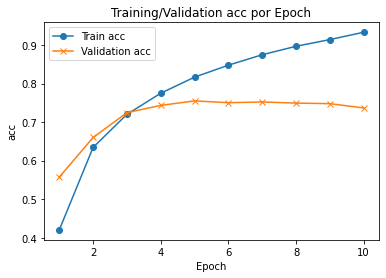

In [6]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
print(history.history['val_accuracy'])
ax.plot([None] + history.history['accuracy'], 'o-')
ax.plot([None] + history.history['val_accuracy'],'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc por Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

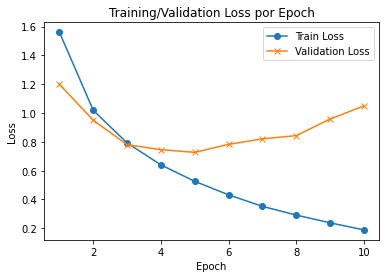

In [7]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + history.history['loss'], 'o-')
ax.plot([None] + history.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss por Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')